Medical Insurance Premium Prediction System

In [148]:
#Libraries for computing

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

Med Insurance Dataset is an overall collection of data for understanding the factors influencing medical costs and health insurance premiums. The dataset contains information about 10 key variables, providing insights into the diverse factors that impact insurance pricing. The variables include:
- **Age:** The age of the insured individual.
- **Gender:** The gender of the insured individual.
- **BMI (Body Mass Index):** A measure of body fat based on height and weight.
- **Children:** The number of children covered by the insurance plan.
- **Smoking Status:** Indicates whether the individual is a smoker.
- **Region:** The geographical region of the insured individual.
- **Medical History:** Information about the individual's old medical problems.
- **Family Medical History:** Information about the family's medical record.
- **Exercise Frequency:** The frequency of the individual's exercise routine.
- **Occupation:** The occupation of the insured individual.
- **Coverage Level:** The type of insurance plan.
- **Charges:** The health insurance charges for the individual.

**Data Types:**
* The 'age' and 'children' columns are of integer type.
* The 'bmi' and 'charges' columns are of float type.
* 'gender', 'smoker', 'region', 'medical_history', 'family_medical_history', 'exercise_frequency', 'occupation', and 'coverage_level' are categorical columns of object type.

 

**Categorical Features:**
* Categorical features include 'gender', 'smoker', 'region', 'medical_history', 'family_medical_history', 'exercise_frequency', 'occupation', and 'coverage_level'. These may need encoding for model training.

**Target Variable:**
* The 'charges' column is the target variable as it is of float type.

In [149]:
df = pd.read_csv('C:\\Users\\USER\\Downloads\\New Folder (3)\\insurance_dataset.csv') #Importing the dataset
df.head() #first 5 rows

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.4500,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.3077
1,25,female,25.3800,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.8992
2,38,male,44.8800,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.4763
3,25,male,19.8900,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.0298
4,49,male,38.2100,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.3098


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   age                     1000000 non-null  int64  
 1   gender                  1000000 non-null  object 
 2   bmi                     1000000 non-null  float64
 3   children                1000000 non-null  int64  
 4   smoker                  1000000 non-null  object 
 5   region                  1000000 non-null  object 
 6   medical_history         749238 non-null   object 
 7   family_medical_history  749596 non-null   object 
 8   exercise_frequency      1000000 non-null  object 
 9   occupation              1000000 non-null  object 
 10  coverage_level          1000000 non-null  object 
 11  charges                 1000000 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 91.6+ MB


**Handling Missing Values**

In [53]:
df.isnull().sum() # checks for missing values

age                            0
gender                         0
bmi                            0
children                       0
smoker                         0
region                         0
medical_history           250762
family_medical_history    250404
exercise_frequency             0
occupation                     0
coverage_level                 0
charges                        0
dtype: int64

In [150]:
#fill null values

for column in df.columns:
  dtype = df[column].dtypes
  if((dtype == 'int64') | (dtype =='float64')):
        mean_value = df[column].mean()
        df[column].fillna(value=mean_value, inplace=True)
  else:
      mode_value = df[column].mode()
      df[column].fillna(value=mode_value[0], inplace=True)

In [55]:
df.isnull().sum()

age                       0
gender                    0
bmi                       0
children                  0
smoker                    0
region                    0
medical_history           0
family_medical_history    0
exercise_frequency        0
occupation                0
coverage_level            0
charges                   0
dtype: int64

In [151]:
df.describe()

,age,bmi,children,charges
count,1000000.0000,1000000.0000,1000000.0000,1000000.0000
mean,41.4953,34.0018,2.4999,16735.1175
std,13.8552,9.2317,1.7077,4415.8082
min,18.0000,18.0000,0.0000,3445.0116
25%,29.0000,26.0200,1.0000,13600.3724
50%,41.0000,34.0000,2.0000,16622.1280
75%,53.0000,41.9900,4.0000,19781.4654
max,65.0000,50.0000,5.0000,32561.5604


<Axes: >

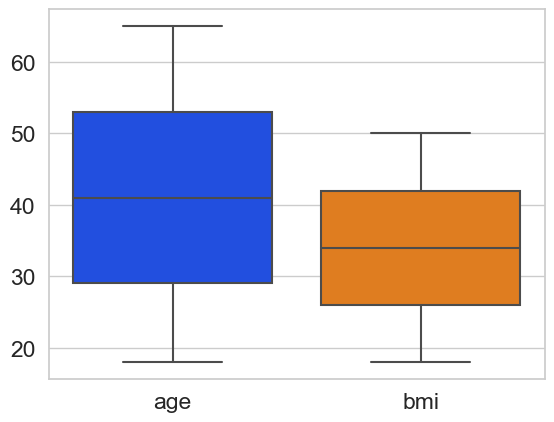

In [63]:
#Detecting outliers with boxplot on age and bmi
sns.boxplot(df[['age','bmi']])

In [64]:
#No outliers were found

In [160]:
new_df = df.sample(n=3000,random_state=101) #A random sample of 3000 rows are taken for processing 

In [161]:
#Encoding on Categorical Features with One Hot Encoding
new_df = pd.get_dummies(new_df)

In [154]:
new_df.columns

Index(['age', 'bmi', 'children', 'charges', 'gender_female', 'gender_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'medical_history_Diabetes',
       'medical_history_Heart disease', 'medical_history_High blood pressure',
       'family_medical_history_Diabetes',
       'family_medical_history_Heart disease',
       'family_medical_history_High blood pressure',
       'exercise_frequency_Frequently', 'exercise_frequency_Never',
       'exercise_frequency_Occasionally', 'exercise_frequency_Rarely',
       'occupation_Blue collar', 'occupation_Student', 'occupation_Unemployed',
       'occupation_White collar', 'coverage_level_Basic',
       'coverage_level_Premium', 'coverage_level_Standard'],
      dtype='object')

In [155]:
new_df.head()

,age,bmi,children,charges,gender_female,gender_male,smoker_no,smoker_yes,region_northeast,region_northwest,...,exercise_frequency_Never,exercise_frequency_Occasionally,exercise_frequency_Rarely,occupation_Blue collar,occupation_Student,occupation_Unemployed,occupation_White collar,coverage_level_Basic,coverage_level_Premium,coverage_level_Standard
180580,23,24.8000,5,22055.7561,False,True,False,True,False,True,...,False,False,True,False,True,False,False,False,True,False
209773,41,49.4900,1,16421.5201,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
820631,36,44.0000,1,22794.5031,False,True,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
886397,25,35.9500,4,13825.7908,False,True,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True
672192,61,41.7600,0,18391.4845,True,False,True,False,False,True,...,False,False,False,False,True,False,False,False,True,False


In [65]:
df.describe()

,age,bmi,children,charges
count,1000000.0000,1000000.0000,1000000.0000,1000000.0000
mean,41.4953,34.0018,2.4999,16735.1175
std,13.8552,9.2317,1.7077,4415.8082
min,18.0000,18.0000,0.0000,3445.0116
25%,29.0000,26.0200,1.0000,13600.3724
50%,41.0000,34.0000,2.0000,16622.1280
75%,53.0000,41.9900,4.0000,19781.4654
max,65.0000,50.0000,5.0000,32561.5604


In [69]:
df.age.describe()

count   1000000.0000
mean         41.4953
std          13.8552
min          18.0000
25%          29.0000
50%          41.0000
75%          53.0000
max          65.0000
Name: age, dtype: float64

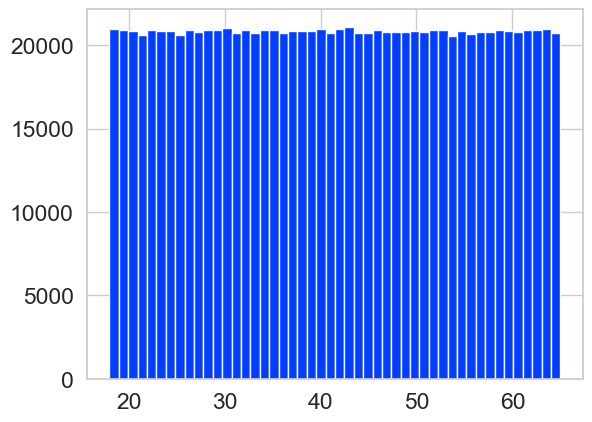

In [129]:
#Min age is 18 and the maximum age is 65
fig = plt.hist(df['age'],bins=48)

In [130]:
df.children.value_counts()

children
3    166925
2    166763
5    166733
0    166652
1    166596
4    166331
Name: count, dtype: int64

Text(0.5, 1.0, 'Distibution of Number of children')

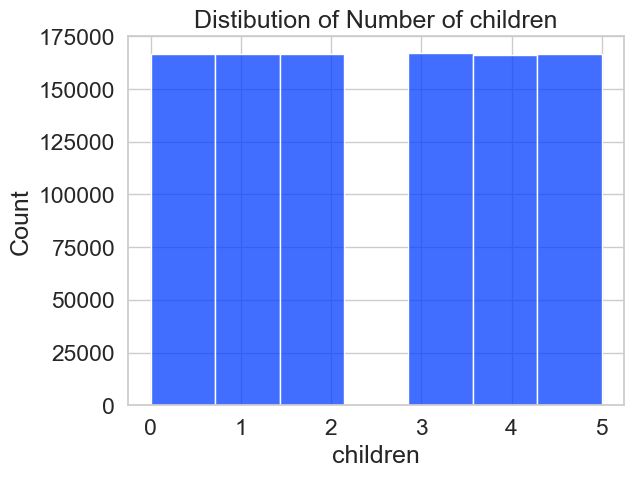

In [131]:
fig = sns.histplot(df,x='children',bins=7)
plt.title('Distibution of Number of children')

In [78]:
df.isnull().sum()

age                       0
gender                    0
bmi                       0
children                  0
smoker                    0
region                    0
medical_history           0
family_medical_history    0
exercise_frequency        0
occupation                0
coverage_level            0
charges                   0
dtype: int64

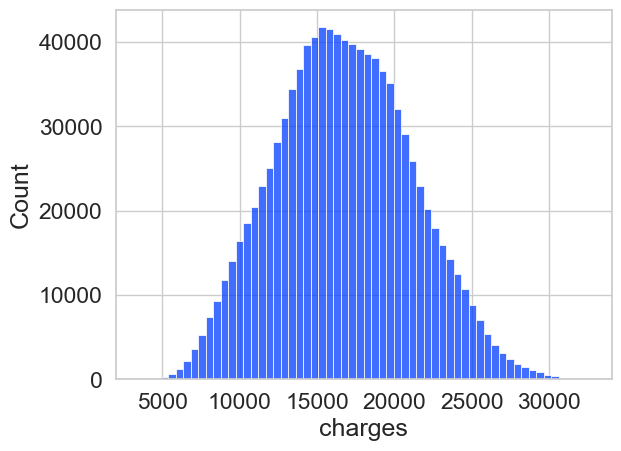

16735.117480593424


In [132]:
fig = sns.histplot(data=df,x='charges',bins=60)
plt.show()
print(df['charges'].mean())

In [81]:
print(df['charges'].describe())

count   1000000.0000
mean      16735.1175
std        4415.8082
min        3445.0116
25%       13600.3724
50%       16622.1280
75%       19781.4654
max       32561.5604
Name: charges, dtype: float64


<Axes: xlabel='charges', ylabel='Count'>

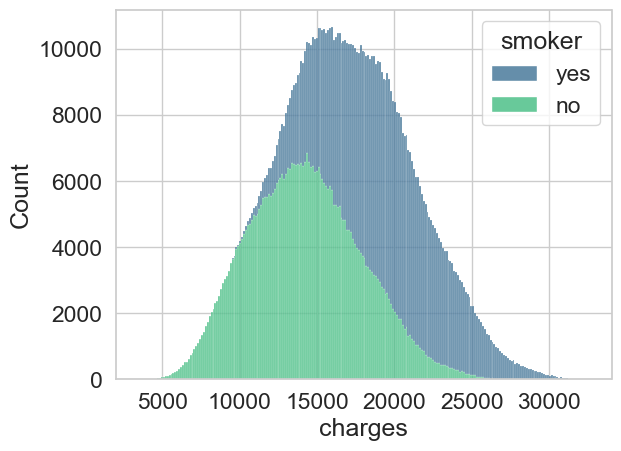

In [133]:
#Smoker vs Charges
sns.histplot(x = 'charges', hue = 'smoker', data = df, multiple = 'stack', palette = 'viridis')

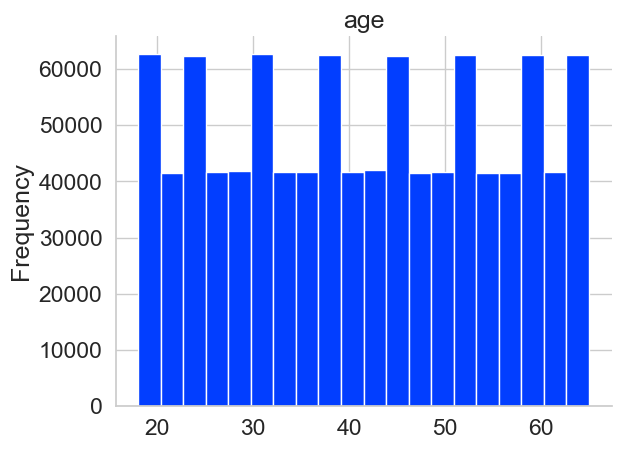

In [86]:
df['age'].plot(kind='hist', bins=20, title='age')

Text(0.5, 1.0, 'Charges vs. BMI')

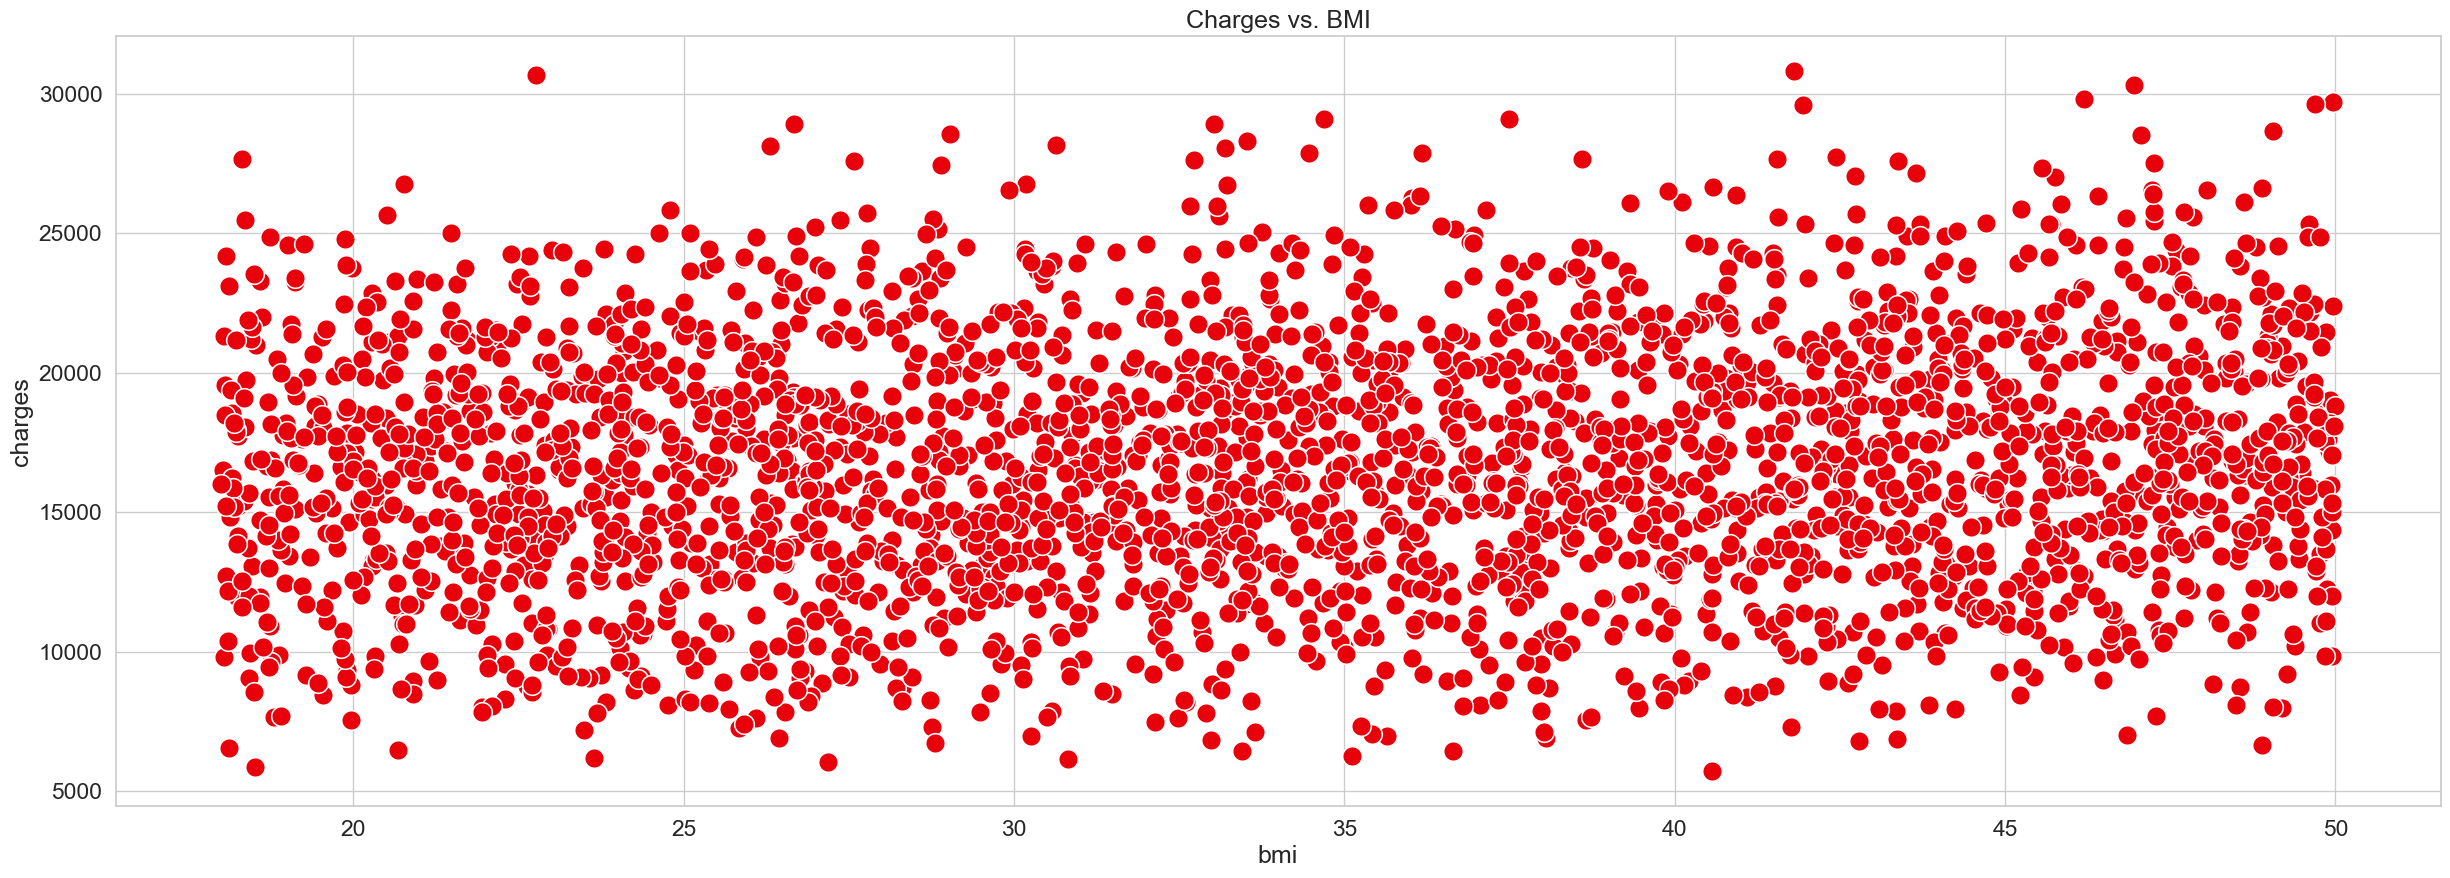

In [134]:
plt.figure(figsize=(30,10))
fig = sns.scatterplot(data=new_df,y='charges',x='bmi',s=200,palette='dark',c='r',alpha=1)

plt.title('Charges vs BMI')

Text(0.5, 1.0, 'Charges vs. Age')

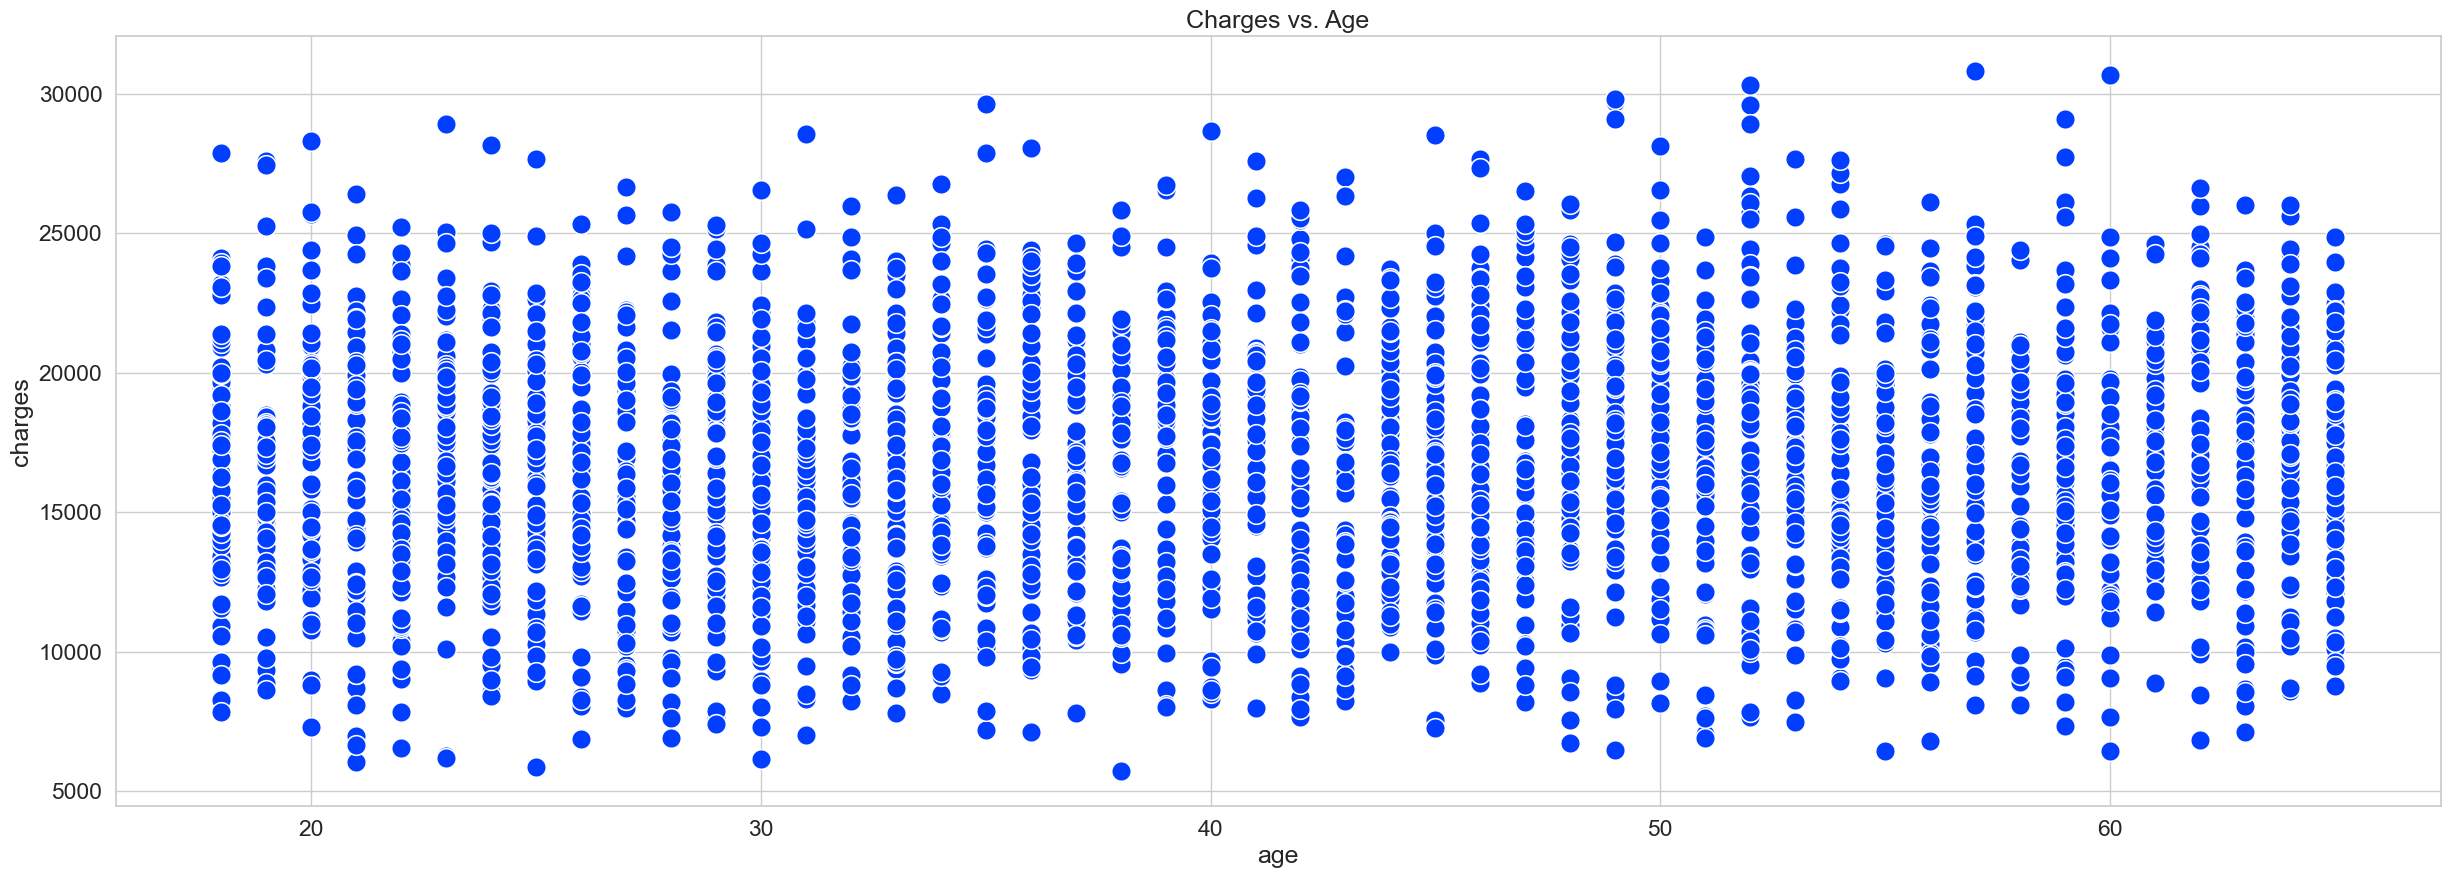

In [135]:
plt.figure(figsize=(30,10))
fig = sns.scatterplot(data=new_df,y='charges',x='age',s=200)
plt.title('Charges vs. Age')

Text(0.5, 1.0, 'Charges vs Gender')

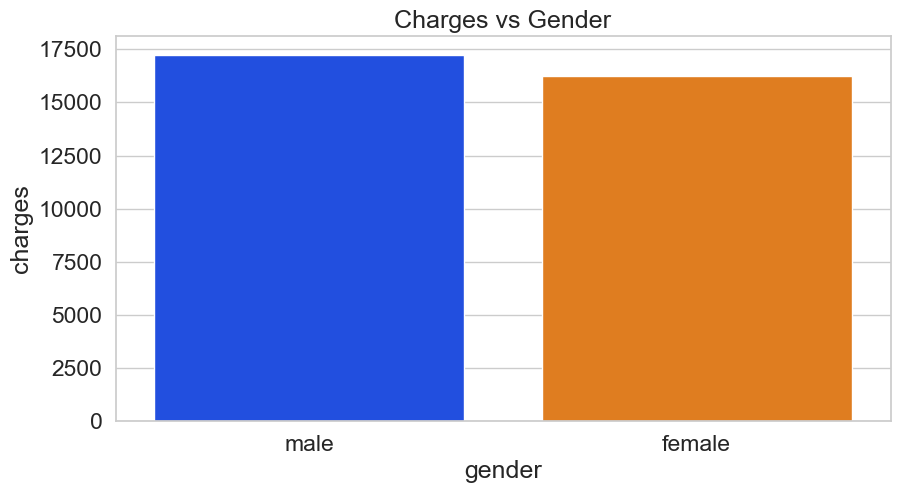

In [90]:
plt.figure(figsize=(10,5))
fig = sns.barplot(df,y='charges',x='gender')
plt.title('Charges vs Gender')

In [94]:
df.smoker.value_counts()

smoker
yes    500129
no     499871
Name: count, dtype: int64

### Test Train Data Splitting

In [162]:
y = new_df['charges']
x = new_df.drop('charges',axis=1)

In [157]:
correlation_matrix = new_df.corr()

In [111]:
correlation_matrix

,age,bmi,children,charges,gender_female,gender_male,smoker_no,smoker_yes,region_northeast,region_northwest,...,exercise_frequency_Never,exercise_frequency_Occasionally,exercise_frequency_Rarely,occupation_Blue collar,occupation_Student,occupation_Unemployed,occupation_White collar,coverage_level_Basic,coverage_level_Premium,coverage_level_Standard
age,1.0000,-0.0060,-0.0208,0.0426,0.0005,-0.0005,-0.0037,0.0037,0.0085,-0.0236,...,-0.0189,0.0059,0.0087,0.0122,0.0205,0.0112,-0.0435,0.0150,0.0005,-0.0152
bmi,-0.0060,1.0000,0.0316,0.0814,-0.0048,0.0048,0.0207,-0.0207,0.0285,-0.0296,...,0.0138,-0.0085,0.0089,0.0339,-0.0246,-0.0169,0.0069,-0.0276,0.0102,0.0170
children,-0.0208,0.0316,1.0000,0.0746,0.0189,-0.0189,-0.0213,0.0213,-0.0063,0.0160,...,0.0348,-0.0333,-0.0046,0.0303,-0.0524,0.0565,-0.0327,-0.0003,-0.0208,0.0211
charges,0.0426,0.0814,0.0746,1.0000,-0.0645,0.0645,-0.5931,0.5931,0.0834,-0.0017,...,-0.1618,0.0244,-0.0035,0.0979,-0.0652,-0.1618,0.1238,-0.3709,0.4218,-0.0569
gender_female,0.0005,-0.0048,0.0189,-0.0645,1.0000,-1.0000,-0.0160,0.0160,0.0115,0.0043,...,-0.0473,0.0077,0.0027,-0.0002,-0.0214,0.0302,-0.0076,-0.0344,0.0402,-0.0063
gender_male,-0.0005,0.0048,-0.0189,0.0645,-1.0000,1.0000,0.0160,-0.0160,-0.0115,-0.0043,...,0.0473,-0.0077,-0.0027,0.0002,0.0214,-0.0302,0.0076,0.0344,-0.0402,0.0063
smoker_no,-0.0037,0.0207,-0.0213,-0.5931,-0.0160,0.0160,1.0000,-1.0000,-0.0014,-0.0087,...,0.0350,0.0024,-0.0250,-0.0115,-0.0271,0.0138,0.0252,0.0095,-0.0085,-0.0009
smoker_yes,0.0037,-0.0207,0.0213,0.5931,0.0160,-0.0160,-1.0000,1.0000,0.0014,0.0087,...,-0.0350,-0.0024,0.0250,0.0115,0.0271,-0.0138,-0.0252,-0.0095,0.0085,0.0009
region_northeast,0.0085,0.0285,-0.0063,0.0834,0.0115,-0.0115,-0.0014,0.0014,1.0000,-0.3347,...,0.0215,-0.0320,-0.0108,0.0213,-0.0281,-0.0195,0.0256,-0.0010,-0.0208,0.0218
region_northwest,-0.0236,-0.0296,0.0160,-0.0017,0.0043,-0.0043,-0.0087,0.0087,-0.3347,1.0000,...,0.0098,0.0018,-0.0040,0.0009,0.0131,-0.0219,0.0072,-0.0182,0.0334,-0.0155


<Axes: >

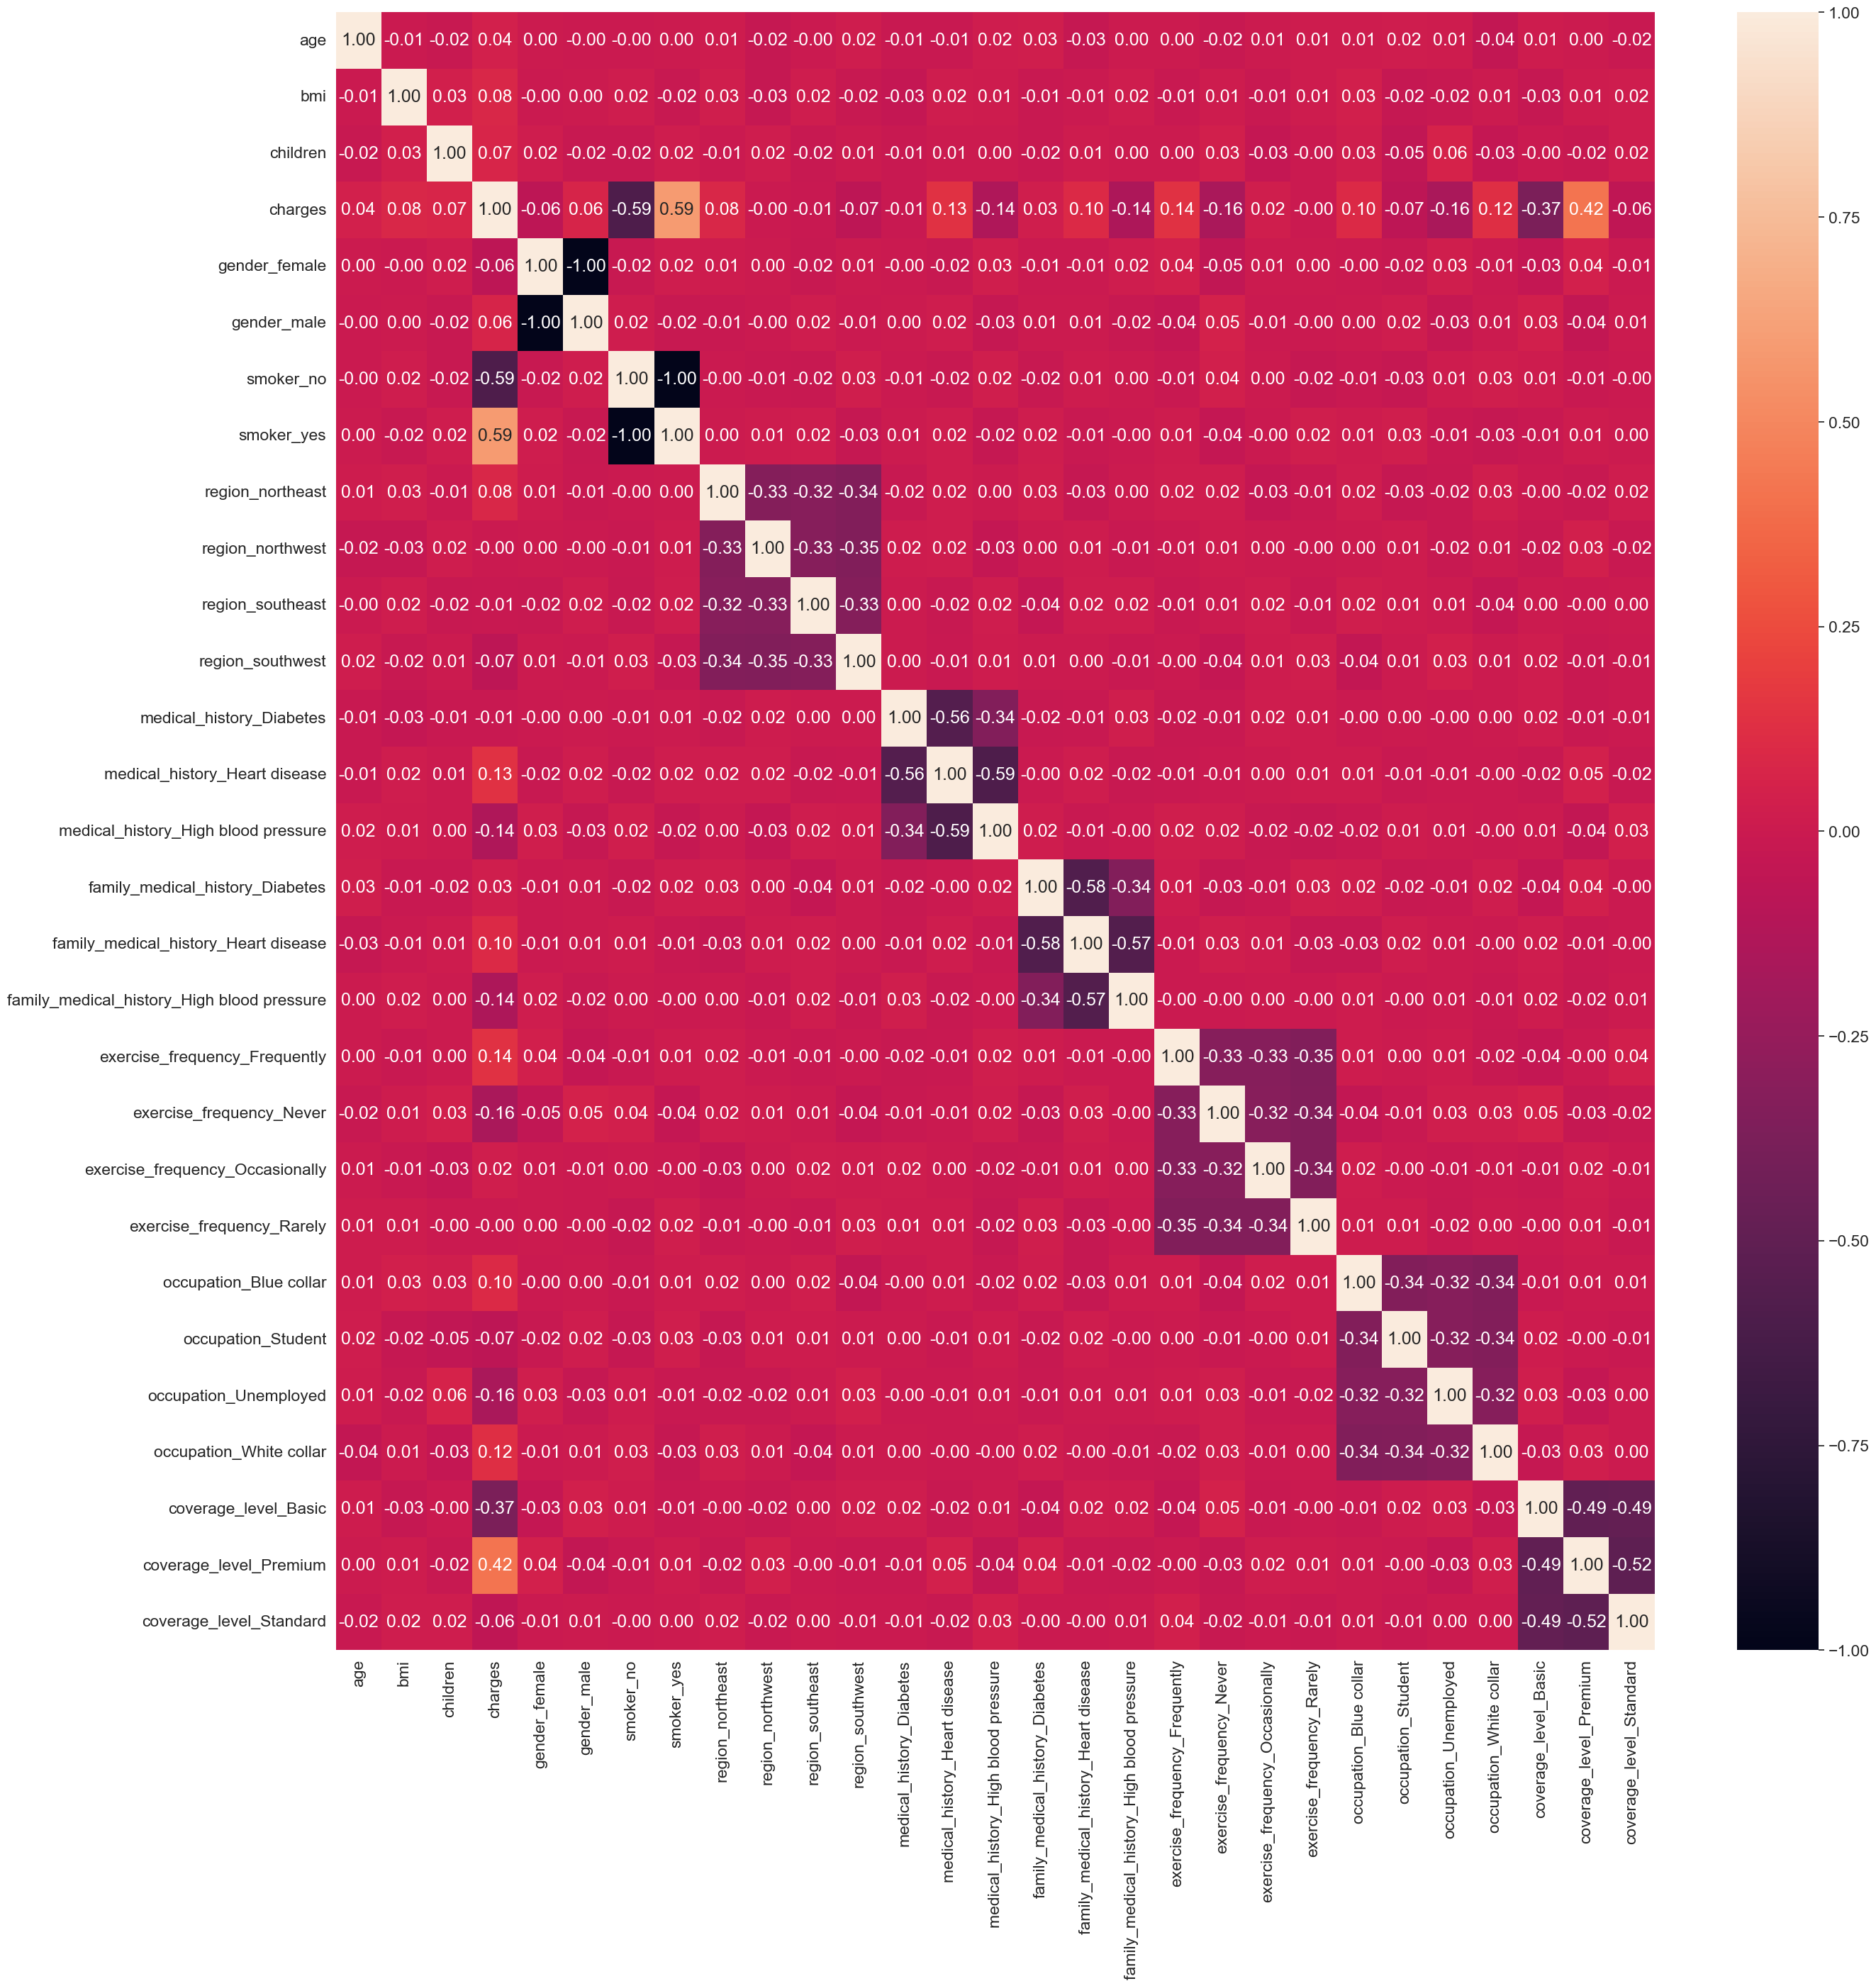

In [112]:
plt.figure(figsize = (30,30))
sns.heatmap(correlation_matrix,vmax=1,vmin=-1,annot=True,fmt=".2f")

In [163]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [165]:
# standardising the data
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [166]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
Train_Y_Predicted = lr.predict(X_train)
Test_Y_Predicted = lr.predict(X_test)
print('Training Accuracy',r2_score(Y_train,Train_Y_Predicted))
print('Testing Accuracy',r2_score(Y_test,Test_Y_Predicted))

Training Accuracy 0.6925227711548241
Testing Accuracy 0.6788916063152444


In [ ]:
# Smoking has the most impact on Medical Insurance premiums